In [45]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")
color = sns.color_palette()

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Data

In [12]:
hitters = pd.read_csv("Hitters.csv")
hitters = hitters.drop(["Unnamed: 0", "NewLeague", "League", "Division"], axis = 1)

hitters.head(5)
hitters.info()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5


In [14]:
hitters = hitters.dropna()
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 17 columns):
AtBat      263 non-null int64
Hits       263 non-null int64
HmRun      263 non-null int64
Runs       263 non-null int64
RBI        263 non-null int64
Walks      263 non-null int64
Years      263 non-null int64
CAtBat     263 non-null int64
CHits      263 non-null int64
CHmRun     263 non-null int64
CRuns      263 non-null int64
CRBI       263 non-null int64
CWalks     263 non-null int64
PutOuts    263 non-null int64
Assists    263 non-null int64
Errors     263 non-null int64
Salary     263 non-null float64
dtypes: float64(1), int64(16)
memory usage: 37.0 KB


In [19]:
Y = hitters.Salary
X = hitters.drop('Salary', axis = 1)
X.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25


In [20]:
x_train, x_test , y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [30]:
features = list(X.columns)

## LASSO regression

In [34]:
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 9, 10, 20]

In [55]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso_model = lasso.fit(scale(x_train), y_train)
    coefs.append(lasso.coef_)
    feature = []
    for co, fea in zip(lasso_model.coef_, features):
        if co > 0:
            feature.append(fea)
    print(feature)   

['Hits', 'HmRun', 'Walks', 'Years', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'PutOuts', 'Assists']
['Hits', 'HmRun', 'Walks', 'Years', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'PutOuts', 'Assists']
['Hits', 'HmRun', 'Walks', 'Years', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'PutOuts', 'Assists']
['Hits', 'HmRun', 'Walks', 'Years', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'PutOuts', 'Assists']
['Hits', 'HmRun', 'Walks', 'Years', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'PutOuts', 'Assists']
['Hits', 'HmRun', 'Walks', 'Years', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'PutOuts', 'Assists']
['Hits', 'Walks', 'CHmRun', 'CRuns', 'CRBI', 'PutOuts']
['Hits', 'Walks', 'CHmRun', 'CRuns', 'CRBI', 'PutOuts']
['Hits', 'Walks', 'CRBI']
['Hits', 'CRBI']
[]


/Users/xuxinya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7451873.523023953, tolerance: 3568.8891894752323
  positive)


Text(0, 0.5, 'weights')

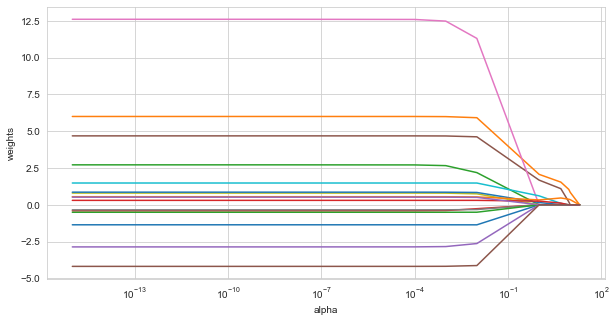

In [51]:
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

The final three predictors that remain in the model are Hits, CRBI, Walks

In [46]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_model2 = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 10)

lasso_model2.fit(x_train, y_train)

/Users/xuxinya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5358803.031840167, tolerance: 3361.2627452033908
  positive)
/Users/xuxinya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6773160.012902978, tolerance: 3326.006087646467
  positive)
/Users/xuxinya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6657620.308178781, tolerance: 3144.0838424213784
  positive)
/Users/xuxinya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.251145302920858, copy_X=True,
                             fit_intercept=True, max_iter=10000, normalize=True,
                             positive=False, precompute=False,
                             random_state=None, selection='cyclic', tol=0.0001,
                             warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [47]:
lasso_model2.best_params_

{'alpha': 1}

The optimal value of alpha is 1

In [49]:
pd.Series(lasso.coef_, index=X.columns)

AtBat      0.000000
Hits       2.036511
HmRun     -0.000000
Runs       0.000000
RBI        0.000000
Walks      1.640917
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.577124
CRuns      0.145492
CRBI       0.340843
CWalks     0.000000
PutOuts    0.241913
Assists    0.000000
Errors    -0.000000
dtype: float64

There are six predictors left in the model, they are ['Hits', 'Walks', 'CHmRun', 'CRuns', 'CRBI', 'PutOuts']

## Ridge Regression

Text(0, 0.5, 'weights')

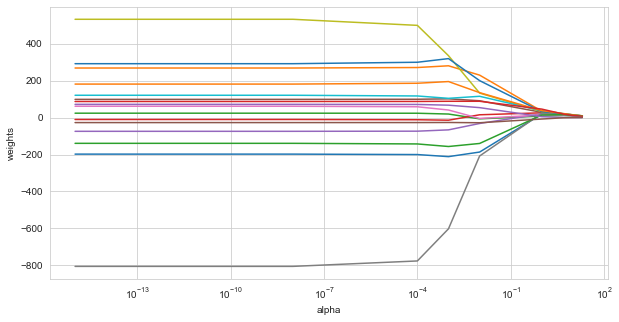

In [59]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge_model = ridge.fit(scale(x_train), y_train)
    coefs.append(ridge.coef_) 
    
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [60]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}


ridge_model2 = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv = 10)

ridge_model2.fit(x_train, y_train)

/Users/xuxinya/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=20, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [61]:
ridge_model2.best_params_

{'alpha': 0.01}

The optimal vaule is 0.01

## bias-variance tradeoff

Bias is the difference between the prediction of model and the actual value. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.

Variance is the variability of model prediction for a data point. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. So, it performs very well on training data but has high error rates on test data.

It's impossible to make our model perform well in both bias and variance, so we have to choose one of them and give up another one.If our model is too simple and has very few parameters then it may have high bias and low variance. On the other hand if our model has large number of parameters then it’s going to have high variance and low bias. 

We use regularization to prevent overfitting by penalizing each weight of features so that it makes a good prediction on a test set that it has not seen before. Lasso Regularization can be used in selecting features by shrinking the contribution of each feature just like the above example. We finally reduce our features from 10 to 6, which is a midpoint between high bias and high variance.